# ЕГЭ 2017 Вариант 3 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 3
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

[IPv4 - Address Classes](https://www.tutorialspoint.com/ipv4/ipv4_address_classes.htm)

In [2]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)

In [3]:
# install.packages('')

In [4]:
answer_dictionary <- hash()

In [5]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")  

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1

## 1.
Сколько единиц содержится в двоичной записи восьмеричного числа $2417_8$?

How many units are contained in the binary notation of the octal number $ 2417_8 $?

In [6]:
options(scipen = 999)
dec2bin <- function(n) {
  bv <- rep(0, 1 + floor(log(n, 2)))
  while (n >= 2) {
    pow <- floor(log(n, 2))
    bv[1 + pow] <- 1
    n <- n - 2^pow
  }
  bv[1] <- n %% 2
  paste(rev(bv), collapse = "")
}

In [7]:
# 2417 _8 = 1295 _10
2 * 8 ** 3 + 4 * 8 ** 2 + 1 * 8 ** 1 + 7 * 8 ** 0

[1] 1295

In [8]:
# 1295 _10 = 10100001111 _2
dec2bin(1295)

[1] "10100001111"

In [9]:
gsub("0","",dec2bin(1295))

[1] "111111"

In [10]:
nchar(gsub("0","",dec2bin(1295)))

[1] 6

Один разряд в восьмеричной записи соответствует трем разрядам в двоичной системе:

One digit in the octal system corresponds to three digits in the binary system:

$7 * 8^0 = 1 * 2^2 + 1 * 2^1 + 1 * 2^0$

$1 * 8^1 = 1 * 2^3$

$4 * 8^2 = 1 * 2^8$

$2 * 8^3 = 1 * 2^10$

Всего 6 ненулевых коэффициентов различных степеней основания системы 2.

There are 6 nonzero coefficients of different degrees of 2 (the binary system).

In [11]:
answer_dictionary[1] <- nchar(gsub("0","",dec2bin(2 * 8 ** 3 + 4 * 8 ** 2 + 
                                                  1 * 8 ** 1 + 7 * 8 ** 0)))

## 2.
Дан фрагмент таблицы истинности выражения F, зависящего от трех аргументов X, Y, Z.

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые соответствуют F.

---

The truth table fragment of the expression F, depending on three arguments X, Y, Z, is given.

List in ascending order without commas and spaces the numbers of logical expressions that correspond to F.

| $X$ | $Y$ | $Z$ | $F$ |
|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 |

$1) \ X \land Y \lor Z \\ 
2) \ \neg X \land \neg Y \lor \neg Z \\ 
3) \ ( X \lor Y ) \land \neg Z \\ 
4) \ ( X \lor Y ) \to Z \\ 
5) \ \neg X \lor \neg Y \lor Z$

| $X$ | $Y$ | $Z$ | $F$ |
|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 |

$1) \ X \land Y \lor Z \\ 
2) \ \neg X \land \neg Y \lor \neg Z \\ 
3) \ ( X \lor Y ) \land \neg Z \\ 
4) \ ( X \lor Y ) \to Z \\ 
5) \ \neg X \lor \neg Y \lor Z$

In [20]:
bc <- matrix(c(0,0,0, 1,1,0, 0,1,1), nrow=3, ncol=3, byrow = TRUE)
x_implies_y <- function(x,y) {!x | y}

F <- function(X, Y, Z, I) {
    if (I == 1) {return(X & Y | Z)}
    if (I == 2) {return(!X & !Y | !Z)}
    if (I == 3) {return((X | Y) & !Z)}
    if (I == 4) {return(x_implies_y((X | Y),Z))}    
    if (I == 5) {return(!X | !Y | Z)}    
} 

In [21]:
for (i in 1:5){
    result = vector(length=3)
    for (j in 1:3) {result[j] = F(bc[j,1],bc[j,2],bc[j,3],i)}
    if (all(result == c(TRUE,FALSE,TRUE))){print(i)}
}

[1] 4
[1] 5


In [22]:
answer_dictionary[2] <- '45'

## 3.
На рисунке справа схема дорог Н-ского района изображена в виде графа, в таблице содержатся сведения о длинах этих дорог (в километрах).

Так как таблицу и схему рисовали независимо друг от друга, то нумерация населённых пунктов в таблице никак не связана с буквенными обозначениями на графе. 

Определите, какова длина дороги и пункта В в пункт Д. 

В ответе запишите целое число — так, как оно указано в таблице.

---

n the figure, the road scheme of the N-region is drawn in the form of a graph, the table contains information on the lengths of these roads (in kilometers).

Since the table and the graph were drawn independently of each other, the numbering of settlements in the table is not connected with the letter symbols on the graph.

Determine the length of the road from the point В to the point Д. 

In the answer, write down the integer number - as it is indicated in the table.

| &#x123CF; | П1 | П2 | П3 | П4 | П5 | П6 | П7 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **П1** | &#x123CF; | 40 | 50 | |  |  | |
| **П2** | 40 | &#x123CF; | 15 |  | 60 |  |  |
| **П3** | 50 | 15 | &#x123CF; | 25 | 30 |  |  |
| **П4** |  |  | 25 | &#x123CF; | 70 | 20 |  |
| **П5** |  | 60 | 30 | 70 | &#x123CF; | 35 | 45 |
| **П6** |  |  |  | 20 | 35 | &#x123CF; | 55 |
| **П7** |  |  |  |  | 45 | 55 | &#x123CF; |

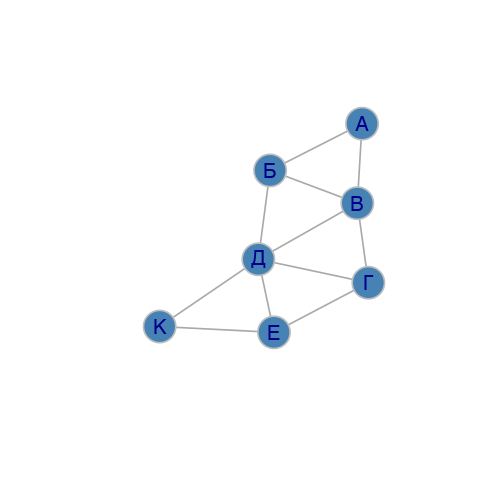

In [28]:
options(warn = -1,repr.plot.width=4,repr.plot.height=4)
edges <- c('А','Б', 'А','В', 'Б','В', 'Б','Д',
           'В','Г', 'В','Д', 'Г','Д', 'Г','Е',
           'Д','Е', 'Д','К', 'Е','К')

g <- graph(edges, directed=FALSE)
plot(g,vertex.color="steelblue", vertex.size=30, vertex.frame.color="gray")

- Только один узел имеет 5 ребер => Д == П5.
- Только один узел имеет 4 ребра => В == П3.
- А - один из узлов с 2 ребрами и А <-> В => А == П1.
- Б - один из узлов с 3 ребрами и Б <-> А, Б <-> В => Б == П2.
- Г - один из узлов с 3 ребрами и Г <-> В => Г == П4.
- Е - оставшийся узел с 3 ребрами => Е == Π6.
- К == П7.

---

- Only one node has 5 edges => Д == П5.
- Only one node has 4 edges => В == П3.
- А is one of the nodes with 2 edges and А <-> В => А == П1.
- Б is one of the nodes with 3 edges and Б <-> А, Б <-> В => Б == П2.
- Γ is one of the nodes with 3 edges and Г <-> В => Г == П4.
- Е is the remaining node with 3 edges => Е == Π6.
- К == П7.

| &#x123CF; | П1=А | П2=Б | П3=В | П4=Г | П5=Д | П6=Е | П7=К |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **П1=А** | &#x123CF; | 40 | 50 | |  |  | |
| **П2=Б** | 40 | &#x123CF; | 15 |  | 60 |  |  |
| **П3=В** | 50 | 15 | &#x123CF; | 25 | 30 |  |  |
| **П4=Г** |  |  | 25 | &#x123CF; | 70 | 20 |  |
| **П5=Д** |  | 60 | 30 | 70 | &#x123CF; | 35 | 45 |
| **П6=Е** |  |  |  | 20 | 35 | &#x123CF; | 55 |
| **П7=К** |  |  |  |  | 45 | 55 | &#x123CF; |

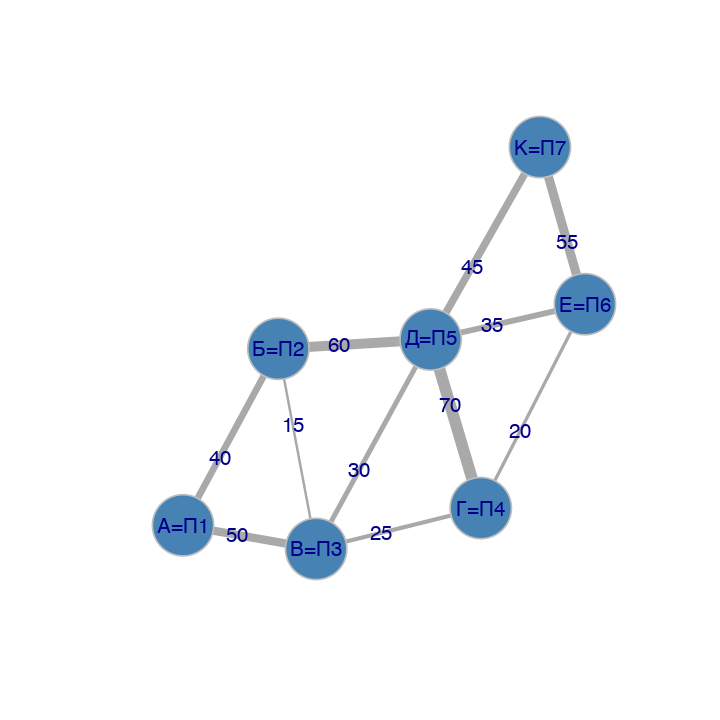

In [31]:
options(warn = -1,repr.plot.width=6,repr.plot.height=6)
edges <- c('А=П1','Б=П2', 'А=П1','В=П3', 'Б=П2','В=П3', 'Б=П2','Д=П5',
           'В=П3','Г=П4', 'В=П3','Д=П5', 'Г=П4','Д=П5', 'Г=П4','Е=П6',
           'Д=П5','Е=П6', 'Д=П5','К=П7', 'Е=П6','К=П7')
weights <- c(40,50,15,60,25,30,70,20,35,45,55)

g <- graph(edges, directed=FALSE)%>%
    set_edge_attr("weight", value=weights)
plot(g,
     vertex.color="steelblue",vertex.size=30,vertex.frame.color="gray",
     edge.label=E(g)$weight,edge.width=E(g)$weight/10)

In [32]:
g['В=П3']['Д=П5']

Д=П5 
  30

In [33]:
answer_dictionary[3] <- toString(g['В=П3']['Д=П5'])

## 4.
Для групповых операций с файлами используются маски имён файлов. 

Маска представляет собой последовательность букв, цифр и прочих допустимых в именах файлов символов, в которой также могут встречаться следующие символы.

Символ $«?»$ (вопросительный знак) означает ровно один произвольный символ.

Символ $«*»$ (звёздочка) означает любую последовательность символов произвольной длины, в том числе $«*»$ может задавать и пустую последовательность.

В каталоге находятся шесть файлов. 

`ask.c`, `kasko.cpp`, `kraska.doc`, `nebraska.docx`, `mask.pic`, `laska.dpr`

Ниже представлено восемь масок. 

`*?sk*.???*`, `*a*k*.*c*`, `*ask?.*c*`, `*ask*.??c*`, `*a??a*.??c*`, `*.??*`,'`*ka*.?*?`, `*sk*.d*`

Сколько из них таких, которым соответствует ровно три файла из данного каталога?

---

For group operations with files, file name masks are used. 

A mask is a sequence of letters, numbers and other permissible characters in file names, in which the following characters can also occur.

The symbol $?$ (question mark) means exactly one arbitrary character.

The symbol $*$ (asterisk) stands for any sequence of characters of arbitrary length, including $*$, which can also specify an empty sequence.

There are six files in the directory. 

`ask.c`, `kasko.cpp`, `kraska.doc`, `nebraska.docx`, `mask.pic`, `laska.dpr`

Here are eight masks.

`*?sk*.???*`, `*a*k*.*c*`, `*ask?.*c*`, `*ask*.??c*`, `*a??a*.??c*`, `*.??*`,'`*ka*.?*?`, `*sk*.d*`

How many of them are those to which exactly three files from this catalog correspond?

In [35]:
file_list <- c('ask.c', 'kasko.cpp', 'kraska.doc', 
               'nebraska.docx', 'mask.pic', 'laska.dpr')
mask_list <- c('?ask*.???*', '*ask*.*c*', '*as??.*c*', '*ask*.???',
               '*a*a*.*d*', '*aska*.?*?', '?????*.???', '?s*k?.*')

df <- data.frame(file_list=file_list,
                 mask_1=grepl("^.*.sk.*\\.....*$",file_list), 
                 mask_2=grepl("^.*a.*k.*\\..*c.*$", file_list), 
                 mask_3=grepl("^.*ask.\\..*c.*$", file_list), 
                 mask_4=grepl("^.*ask.*\\...c.*$", file_list),
                 mask_5=grepl("^.*a..a.*\\...c.*$",file_list), 
                 mask_6=grepl("^.*\\....*$", file_list), 
                 mask_7=grepl("^.*ka.*\\...*.$", file_list), 
                 mask_8=grepl("^.*sk.*\\.d.*$", file_list))
df 

file_list,mask_1,mask_2,mask_3,mask_4,mask_5,mask_6,mask_7,mask_8
ask.c,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
kasko.cpp,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
kraska.doc,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
nebraska.docx,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
mask.pic,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
laska.dpr,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [36]:
c <- 0
for (i in 2:9) {
    print(mask_list[i-1]); 
    print(length(df[1:6,i][df[1:6,i]==TRUE]))
    if (length(df[1:6,i][df[1:6,i]==TRUE]) == 3) {c <- c + 1}
}

c

[1] "?ask*.???*"
[1] 5
[1] "*ask*.*c*"
[1] 5
[1] "*as??.*c*"
[1] 3
[1] "*ask*.???"
[1] 3
[1] "*a*a*.*d*"
[1] 2
[1] "*aska*.?*?"
[1] 5
[1] "?????*.???"
[1] 4
[1] "?s*k?.*"
[1] 3


[1] 3

In [37]:
answer_dictionary[4] <- toString(c)

## 5.
Для кодирования некоторой последовательности, состоящей из букв А, Б, В, Г и Д, используется неравномерный двоичный код, 

позволяющий однозначно декодировать полученную двоичную последовательность. 

Вот этот код: `А-110`, `Б-10`, `В-01`, `Г-111`. 

Каким кодовым словом должна кодироваться буква Д? 

Если таких вариантов несколько, укажите самый короткий.

---

To encode a sequence consisting of the letters А, Б, В, Г and Д, an unequal binary code is used, 

which uniquely decodes the resulting binary sequence.

Here is the code: `А-110`, `Б-10`, `В-01`, `Г-111`.

What code word should be used for encoding the letter Д? 

If there are several possible variants, specify the shortest one.

В решении использован Алгоритм Шеннона — Фано.

1) Самые короткие коды 0 и 1 не могут быть использованы - с них уже начинаются другие кодовые слова.

2) Следующая бинарная комбинация - из двух цифр. В начале кодовых слов уже встречаются 01, 10 и 11, но нет 00. 

Этим самым коротким из возможных сочетаний и можно закодировать Д.

---

The solution uses the Shannon-Fano Algorithm.

1) The shortest codes 0 and 1 cannot be used - other code words already begin with them.

2) The next binary combination is two-digital. At the beginning of the code words, there are already 01, 10 and 11, but no 00. 

This shortest possible combination can be used for encoding D.

In [39]:
answer_dictionary[5] <- '00'

## 6.
Автомат получает на вход два двузначных шестнадцатеричных числа. 

В этих числах все цифры не превосходят цифру 7 (если в числе есть цифра больше 7, автомат отказывается работать). 

По этим числам строится новое шестнадцатеричное число по следующим правилам.

1. Вычисляются два шестнадцатеричных числа — сумма старших разрядов полученных чисел и сумма младших разрядов этих чисел.

2. Полученные два шестнадцатеричных числа записываются друг за другом в порядке возрастания (без разделителей).

*Пример*. Исходные числа: 52, 66. Поразрядные суммы: В, 8. Результат: 8В.

Какие из предложенных чисел могут быть результатом работы автомата?

Перечислите в алфавитном порядке буквы, соответствующие этим числам, без пробелов и знаков препинания.

**A) 18 B) 2F C) 214 D) 7Е E) В7**

---

The machine receives two two-digit hexadecimal numbers. 

In these numbers, all figures do not exceed 7 (if there is a figure greater than 7 in the number, the machine refuses to work). 

For these numbers, a new hexadecimal number is constructed according to the following rules.

1. Two hexadecimal numbers are calculated - the sum of the highest digits of the obtained numbers and the sum of the lower digits of these numbers.

2. The received two hexadecimal numbers are written one after the other in ascending order (without separators).

*Example*. Original numbers: 52, 66. Bitwise sums: B, 8. Result: 8B.

Which of the suggested numbers can be the result of the operation of this machine?

List the letters in the alphabetical order corresponding to these numbers, without spaces and punctuation marks.

**A) 18 B) 2F C) 214 D) 7E E) B7**

**A) 18**

- Возможный вариант сложения и перестановки цифр:  $20_{16}$ и $61_{16}$  поразрядно суммируются и получается пара $8_{16}, 1_{16}$, затем цифры переставляются $18_{16}$.


**B) 2F**

- Цифры складываемых чисел не превышают $7_{10} (7_{16})$  => их поразрядные суммы не превышают  $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => результат сложения разрядов не может быть $15_{10} (F_{16})$.

**C) 214**

- Цифры складываемых чисел не превышают $7_{10} (7_{16})$  => их поразрядные суммы не превышают  $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => результат не может быть трехзначным в шестнадцатеричной системе.

**D) 7E**

- Возможный вариант сложения и перестановки цифр:  $73_{16}$ и $74_{16}$  поразрядно суммируются и получается пара $E_{16}, 7_{16}$, затем цифры переставляются $7E_{16}$.

**E) B7**

- Цифры расположены в порядке убывания => число не может быть результатом работы автомата.

---

**A) 18**

- The possible variant of adding and rearranging the numbers:  $20_{16}$ and $61_{16}$ are digitally summed and the pair $8_{16}, 1_{16}$ , is obtained, then the digits are rearranged $18_{16}$.

**B) 2F**

- The figures do not exceed $7_{10} (7_{16})$  => their bitwise sums do not exceed $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => the result cannot be a three-digit number in the hexadecimal system.

**C) 214**

- The figures do not exceed $7_{10} (7_{16})$  => their bitwise sums do not exceed $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => the result cannot be $15_{10} (F_{16})$.

**D) 7E**

- The possible variant of adding and rearranging the numbers:  $73_{16}$ and $74_{16}$ are digitally summed and the pair $E_{16}, 7_{16}$ , is obtained, then the digits are rearranged $7E_{16}$.

**E) B7**

- The digits are arranged in descending order => the number cannot be the result of the operation of this machine.

In [42]:
answer_dictionary[6] <- 'AD'

## 7.
В электронной таблице значение формулы `=СРЗНАЧ (С2:D5)` равно 3. 

Чему равно значение формулы `=СУММ (С5:D5)`, если значение формулы `=СРЗНАЧ (С2:D4)` равно 5?

---

In the spreadsheet, the value of the formula `=AVERAGE (C2: D5)` is 3. 

What is the value of the formula `=SUM (C5: D5)` if the value of the formula `=AVERAGE (C2: D4)` is 5?

<div style="width: 600px; height: 300px; overflow:auto;">
    <img src="it_images/2017_03_07a.png" width="600" height="300"/>
</div>
[Google Sheet](https://drive.google.com/open?id=19XfRvVOsEYj-HA7S4vQ3WeW3JOu-N-X8Hdp0oi7LW_o)

In [44]:
# (C2+C3+C4+C5+D2+D3+D4+D5)/8 = 3 <=> C2+C3+C4+C5+D2+D3+D4+D5 = 24
# (C2+C3+C4+D2+D3+D4)/6 = 5 <=> C2+C3+C4+D2+D3+D4 = 30
# C5+D5=C2+C3+C4+C5+D2+D3+D4+D5 - (C2+C3+C4+D2+D3+D4) = 24-30 = -6
answer_dictionary[7] <- toString(8 * 3 - 6 * 5)   

## 8.
Определите, что будет напечатано в результате выполнения следующего фрагмента программы.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
k,s = 1,8

while s < 208:
    s += 20
    k &#42;= 2
    
print(k)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 

k <- 1; s <- 8

while (s < 208){
    s <- s + 20
    k <- k &#42; 2
}

print(k)
    </code></pre></td>     
  </tr>    
</table>

Determine what will be printed as a result of the next program fragment.

In [46]:
k <- 1; s <- 8
while (s < 208){
    s <- s + 20
    k <- k * 2
}
print(k)

[1] 1024


In [48]:
answer_dictionary[8] <- toString(k)

## 9.
Какой минимальный объём памяти (в Кбайт) нужно зарезервировать, 

чтобы можно было сохранить любое растровое изображение размером 64x256 пикселей 

при условии, что в изображении могут использоваться 4 различных цвета? 

В ответе запишите только целое число, единицу измерения писать не нужно.

---

What is the minimum amount of memory (in Kbytes) it needs to reserve, 

so that you can save any raster image with the size of 64x256 pixels, 

provided that it can be used 4 different colors the image? 

In the answer, write down only an integer, you do not need to write a unit of measurement.

- $\log_{2}{4} = 2$ (бита) - необходимо для кодирования одного пикселя 4-цветного изображения.
- $64 * 256 * 2 = 2^{6} * 2^{8} * 2 = 2^{15}$ (бита) - необходимо для кодирования изображения размером 64 * 256 пикселей.
- $2^{15} \ / \ 2^{3} = 2^{12}$ (байта) - необходимо для кодирования изображения размером 64 * 256 пикселей.
- $2^{12} \ / \ 2^{10} = 4$ (Кбайт) - необходимо для кодирования изображения размером 64 * 256 пикселей.

---

- $\log_{2}{4} = 2$ (bit) - necessary to encode one pixel of the 4-color image.
- $64 * 256 * 2 = 2^{6} * 2^{8} * 2 = 2^{15}$ (bit) - needed to encode an image with the size of 64 * 256 pixels.
- $2^{15} \ / \ 2^{3} = 2^{12}$ (byte) - needed to encode an image with the size of 64 * 256 pixels.
- $2^{12} \ / \ 2^{10} = 4$ (Kbytes) - needed to encode an image with the size of 64 * 256 pixels.

In [51]:
answer_dictionary[9] <- toString(log2(4) * 64 * 256 / 2 ** 3 / 2 ** 10)

## 10.
Все 4-буквенные слова, составленные из букв Б, В, Г, Д, записаны в алфавитном порядке. Вот начало списка:

1. `ББББ`

2. `БББВ`

3. `БББГ`

4. `БББД`

5. `ББВБ`

Запишите слово, стоящее на 244-м месте от начала списка.

---

All 4-letter words, composed of the letters Б, В, Г, Д, are written in alphabetical order. Here is the top of the list:

1. `ББББ`

2. `БББВ`

3. `БББГ`

4. `БББД`

5. `ББВБ`

Write down the word that stands on the 244th place from the beginning of the list.

1) Кодирование 4 символами Б, В, Г, Д аналогично переводу в систему счисления с основанием 4, где используются цифры 0,1,2,3.

1. `ББББ: 0000`  
2. `БББВ: 0001`
3. `БББГ: 0002`
4. `БББД: 0003`
5. `ББВБ: 0010`

2) На 244 месте списка целых неотрицательных чисел в десятичной системе счисления стоит 243. 

При переводе в четверичную систему получается $243_{10} = 3 * 4^3 + 3 * 4^2 + 3 * 4^0 = 3303_4$.

3) Заменим на буквенные обозначения 3 → Д, 0 → Б: `ДДБД`.

---

1) Coding with 4 symbols Б, В, Г, Д is analogous to the translation into the number system with base 4, where the digits 0,1,2,3 are used.

1. `ББББ: 0000`
2. `БББВ: 0001`
3. `БББГ: 0002`
4. `БББД: 0003`
5. `ББВБ: 0010`

2) The 244th place of the list of non-negative integers in the decimal system is filled by 243.

When translating into a quaternary system, $243_{10} = 3 * 4^3 + 3 * 4^2 + 3 * 4^0 = 3303_4$ is obtained.

3) Then we replace digits by letters 3 → Д, 0 → Б: `ДДБД`.

In [58]:
four_digit_string <- paste(toString(as.integer(243/4**3)),toString(as.integer(243%%4**3/4**2)),sep='')
four_digit_string <- paste(four_digit_string,toString(as.integer(243%%4**3%%4**2/4)),sep='')
four_digit_string <- paste(four_digit_string,toString(as.integer(243%%4)),sep='')
paste('243 -> ',four_digit_string,sep='')              

[1] "243 -> 3303"

In [59]:
four_digit_string <- gsub('3','Д',four_digit_string)
four_digit_string <- gsub('0','Б',four_digit_string)

In [60]:
answer_dictionary[10] <- four_digit_string

## 11.
Алгоритм вычисления значения функции `F(n)`, где `n` — натуральное число, задан следующими соотношениями:

`F(n) = F(n - 1) + n - 2, при n > 1`

`F(1) - 2`

Чему равно значение функции `F(7)`?

(В ответе запишите только натуральное число.)

---

The algorithm for calculating the value of the function `F(n)`, where `n` is a natural number, is given by the following relations:

`F(n) = F(n - 1) + n - 2, for n > 1`

`F(1) = 2`

What is the value of the function `F(7)`?

(In the answer write down only the natural number.)

In [62]:
F <- function(n) {
    if (n == 1) {
        return(2)
    }
    if (n > 1) {
        return(F(n - 1) + n - 2)
    }
}

F(7)

[1] 17

In [63]:
answer_dictionary[11] <- toString(F(7))

## 12.
На месте преступления были обнаружены четыре обрывка бумаги. Следствие установило, что на них записаны фрагменты одного IP-адреса.

Криминалисты обозначили эти фрагменты буквами A, B, C и D. 

Восстановите IP-адрес.

В ответе укажите последовательность букв, обозначающих фрагменты, в порядке, соответствующем IP-адресу.

| `.25` | `6.8` | `202` | `4.24` |
|:-:|:-:|:-:|:-:|
| A | B | C | D |

At the crime scene, four pieces of paper were found. The investigation found that they recorded fragments of one IP-address. 

Forensics designated these fragments with letters A, B, C and D. 

Recover the IP address.

In the answer, specify the sequence of letters indicating the fragments, in the order corresponding to the IP address.

IP-адрес (IPv4) является 32-битовым (4-байтовым) числом, 

запись которого состоит из последовательности 4 десятичных чисел 

с максимальным значением 255. 

Например: $192.168.0.3$. 

Адрес в задаче содержит 13 символов: 10 цифр и три точки. 

Один из фрагментов ($C$) начинается с трех цифр, но нет фрагментов, заканчивающихся точкой, которых можно было бы присоединить слева.

Значит, $C$ и есть первая часть адреса.

Дальше, согласно структуре записи, должна быть точка. Только один вариант начинается с этого символа - $A$. 

$CA == 202.25$

$B$ не может быть следующим: при его присоединении получается 256 > 255. Значит, третий фрагмент - $D$, а $B$ - четвертый.

$CADB == 202.254.246.8$

---

The IP address (IPv4) is a 32-bit (4-byte) number 

which record consists of a sequence of 4 decimal numbers 

with the maximum value of 255. 

For example: $192.168.0.3$.

The address in the task contains 13 characters: 10 digits and 3 dots. 

One of the fragments ($C$) begins with three digits, but there are no fragments ending with a point that could be added to the left. 

Hence, $C$ is the first part of the address.

Further, according to the structure of the record, there must be a point. Only one fragment starts with this symbol - $A$. 

$CA == 202.25$

$B$ cannot be the next part: when it is attached, we get 256 > 255. This means that the third fragment is $D$, and $B$ is the fourth.

$CADB == 202.254.246.8$

In [65]:
answer_dictionary[12] <- 'CADB'

## 13.
</div>
Для передачи секретного сообщения используется код, состоящий из десятичных цифр. 

При этом все цифры кодируются одним и тем же (минимально возможным) количеством бит. 

Определите информационный объём сообщения (в байтах) длиной в 200 символов.

---

To transmit a secret message, a code consisting of decimal digits is used. 

In this case, all the digits are coded with the same (minimum possible) number of bits. 

Determine the information volume of the message (in bytes) of 200 characters in length.

1) $3 < \log_{2}{10} < 4 \implies 4$ (бит) - необходимо для кодирования номера одного из 10 символов.

Количество возможных вариантов кодировки ($2^4$) не должно быть меньше количества имеющейся информации ($10$ символов), 

округление в данном случае - всегда в большую сторону.

2) $4 * 200 = 800$ (бит) - необходимо для кодирования номеров 200 символов.

3) $800 / 8 = 100$ (байт) - необходимо для кодирования номеров 200 символов.

---

1) $3 < \log_{2}{10} < 4 \implies 4$ (bit) - necessary to encode the number of one of 10 characters.

The number of possible encoding options ($2^4$) should not be less than the amount of information available ($10$ characters), 

rounding, in this case, is always on the larger side.

2) $4 * 200 = 800$  (bits) - necessary for encoding the numbers of 200 characters.

3) $800 / 8 = 100$  (bytes) - necessary for encoding the numbers of 200 characters.

In [67]:
bits_for_one_symbol_from_10 <- ceiling(log2(10))
bits_for_200_symbol_from_10 <- 200 * bits_for_one_symbol_from_10
bytes_for_200_symbol_from_10 <- bits_for_200_symbol_from_10 / 2 ** 3               

In [68]:
answer_dictionary[13] <- toString(bytes_for_200_symbol_from_10)

## 14.
Исполнитель $Редактор$ получает на вход строку цифр и преобразовывает её. 

$Редактор$ может выполнять две команды, в обеих командах `v` и `w` обозначают цепочки цифр.

$А)$ `заменить (v, w)`.

Эта команда заменяет в строке первое слева вхождение цепочки `v` на цепочку` w`. 

Например, выполнение команды `заменить (222, 34)` преобразует строку `77222277` в строку `7734277`. 

Если в строке нет вхождений цепочки `v`, то выполнение команды `заменить (v, w)` не меняет эту строку.

$Б)$ `нашлось (v)`.

Эта команда проверяет, встречается ли цепочка `v` в строке исполнителя $Редактор$. 

Если она встречается, то команда возвращает логическое значение `«истина»`, в противном случае возвращает значение `«ложь»`. 

Строка при этом не изменяется исполнителем.

Цикл 

`ПОКА` $<условие>$

- $последовательность \ команд$
    
`КОНЕЦ ПОКА`

выполняется, пока условие истинно.

В конструкции 

`ЕСЛИ` $<условие>$

- `ТО` $команда \ 1$

- `ИНАЧЕ` $команда \ 2$
    
`КОНЕЦ ЕСЛИ`

выполняется `команда 1` (если условие `"истинно"`) или `команда 2` (если условие `"ложно"`).

Какая строка получится в результате применения приведённой ниже программы к строке, состоящей из 80 идущих подряд цифр 7? 

В ответе запишите полученную строку.

---

The performer $Editor$ receives a string of numbers and converts it. 

It can execute two commands, in both commands, `v` and `w` denote a chain of numbers.

$A)$ `replace (v, w)`.

This command replaces the first from the left with the occurrence of the chain `v` on the chain `w`. 

For example, executing the command to `replace (222, 34)` converts line `77222277` to line `7734277`. 

If there are no occurrences of a chain `v` in the string, then the execution of the command to `replace (v, w)` does not change this line.

$B)$ `found (v)`.

This command checks if the string `v` is found in the line. 

If it occurs, the command returns a logical value of `"true"`, otherwise it returns `"false"`. 

The string is not changed by the performer in this case.

The cycle

`WHILE` $<condition>$

- $command \ sequence$

`END while`

is executed until the condition is true.


In the construction

`IF` $<condition>$

- `THEN` $command \ 1$

- `ELSE` $command \ 2$

`END IF`

the command 1 is executed (if the condition is `"true"`) or command 2 is executed (if the condition is `"false"`).

Which line will result from applying for the program below to the line consisting of 80 consecutive digits 7? 

In the answer write down the received line.

`НАЧАЛО`

`ПОКА` $<нашлось \; (777)>$ `ИЛИ` $<нашлось \; (888)>$

  - `ЕСЛИ` $<нашлось \; (777)>$
    
      - `ТО` $<заменить \; (777, 8)>$
        
      - `ИНАЧЕ` $<заменить \; (888, 7)>$
     
  - `КОНЕЦ ЕСЛИ`
    
`КОНЕЦ ПОКА`

`КОНЕЦ`

---

`START`

`WHILE` $<found \; (777)>$ `OR` $<found \; (888)>$

- `IF` $<found \; (777)>$

  - `THEN` $<replace \; (777, 8)>$
  
  - `ELSE` $<replace \; (888, 7)>$
  
- `END IF`

`END WHILE`

`END`

In [79]:
string <- paste(replicate(80, "7"), collapse = "")
string

[1] "77777777777777777777777777777777777777777777777777777777777777777777777777777777"

In [80]:
grepl("777",string); grepl("888",string)

[1] TRUE

[1] FALSE

In [82]:
string_function <- function(w) {
    while (grepl("777",w) | grepl("888",w)) {
        
        if (grepl("777",w)) { 
            w <- sub('777','8',w)
            print(w)
        } else {
            w <- sub('888','7',w)
            print(w)
        }
    }
    
    return(w)
}

In [83]:
result <- string_function(string)

[1] "8877777777777777777777777777777777777777777777777777777777777777777777777777"
[1] "88877777777777777777777777777777777777777777777777777777777777777777777777"
[1] "888877777777777777777777777777777777777777777777777777777777777777777777"
[1] "8888877777777777777777777777777777777777777777777777777777777777777777"
[1] "88888877777777777777777777777777777777777777777777777777777777777777"
[1] "888888877777777777777777777777777777777777777777777777777777777777"
[1] "8888888877777777777777777777777777777777777777777777777777777777"
[1] "88888888877777777777777777777777777777777777777777777777777777"
[1] "888888888877777777777777777777777777777777777777777777777777"
[1] "8888888888877777777777777777777777777777777777777777777777"
[1] "88888888888877777777777777777777777777777777777777777777"
[1] "888888888888877777777777777777777777777777777777777777"
[1] "8888888888888877777777777777777777777777777777777777"
[1] "88888888888888877777777777777777777777777777777777"
[1] "888888888888888

In [84]:
answer_dictionary[14] <- result

## 15.

На рисунке — схема дорог, связывающих города А, Б, В, Г, Д, Е, Ж, И, К. 

По каждой дороге можно двигаться только в одном направлении, указанном стрелкой. 

Сколько существует различных путей из города А в город К?

---

In the figure - the scheme of roads connecting the cities А, Б, В, Г, Д, Е, Ж, И, К. 

For each road, it is possible to move only in one direction, indicated by the arrow. 

How many different paths exist from the city А to the city К?

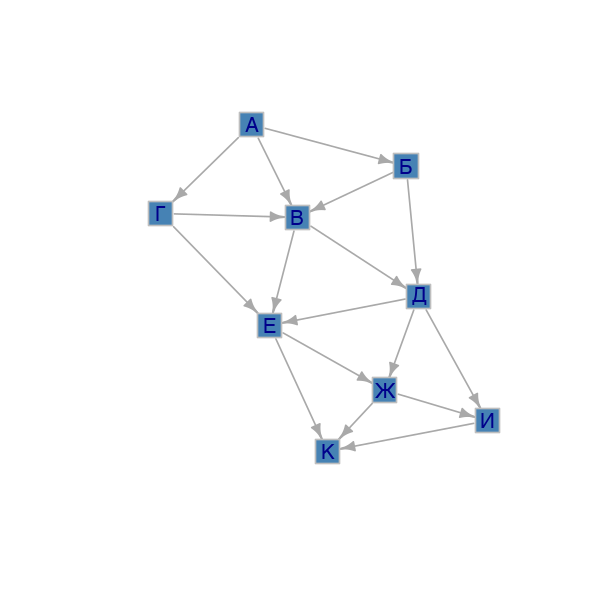

In [87]:
options(warn = -1,repr.plot.width=5,repr.plot.height=5)
edges <- c('А','Б', 'А','В', 'А','Г', 'Б','В', 'Б','Д',
           'В','Д', 'В','Е', 'Г','В', 'Г','Е',
           'Д','Е', 'Д','И', 'Д','Ж', 'Е','Ж', 'Е','К',
           'Ж','И', 'Ж','К', 'И','К')
g2 <- graph(edges)
plot(g2,
     vertex.color="steelblue",vertex.size=15,
     vertex.frame.color="gray",vertex.shape='square')

In [88]:
paths <- all_simple_paths(g2,'А','К')
paths <- lapply(1:length(paths), function(x) as_ids(paths[[x]]))
paths

[[1]]
[1] "А" "Б" "В" "Д" "Е" "Ж" "И" "К"

[[2]]
[1] "А" "Б" "В" "Д" "Е" "Ж" "К"

[[3]]
[1] "А" "Б" "В" "Д" "Е" "К"

[[4]]
[1] "А" "Б" "В" "Д" "И" "К"

[[5]]
[1] "А" "Б" "В" "Д" "Ж" "И" "К"

[[6]]
[1] "А" "Б" "В" "Д" "Ж" "К"

[[7]]
[1] "А" "Б" "В" "Е" "Ж" "И" "К"

[[8]]
[1] "А" "Б" "В" "Е" "Ж" "К"

[[9]]
[1] "А" "Б" "В" "Е" "К"

[[10]]
[1] "А" "Б" "Д" "Е" "Ж" "И" "К"

[[11]]
[1] "А" "Б" "Д" "Е" "Ж" "К"

[[12]]
[1] "А" "Б" "Д" "Е" "К"

[[13]]
[1] "А" "Б" "Д" "И" "К"

[[14]]
[1] "А" "Б" "Д" "Ж" "И" "К"

[[15]]
[1] "А" "Б" "Д" "Ж" "К"

[[16]]
[1] "А" "В" "Д" "Е" "Ж" "И" "К"

[[17]]
[1] "А" "В" "Д" "Е" "Ж" "К"

[[18]]
[1] "А" "В" "Д" "Е" "К"

[[19]]
[1] "А" "В" "Д" "И" "К"

[[20]]
[1] "А" "В" "Д" "Ж" "И" "К"

[[21]]
[1] "А" "В" "Д" "Ж" "К"

[[22]]
[1] "А" "В" "Е" "Ж" "И" "К"

[[23]]
[1] "А" "В" "Е" "Ж" "К"

[[24]]
[1] "А" "В" "Е" "К"

[[25]]
[1] "А" "Г" "В" "Д" "Е" "Ж" "И" "К"

[[26]]
[1] "А" "Г" "В" "Д" "Е" "Ж" "К"

[[27]]
[1] "А" "Г" "В" "Д" "Е" "К"

[[28]]
[1] "А" "Г" "В" "Д" "И" "К"

[[29]]
[1] "А" "Г" "В" "Д" "Ж" "И" "К"

[[30]]
[1] "А" "Г" "В" "Д" "Ж" "К"

[[31]]
[1] "А" "Г" "В" "Е" "Ж" "И" "К"

[[32]]
[1] "А" "Г" "В" "Е" "Ж" "К"

[[33]]
[1] "А" "Г" "В" "Е" "К"

[[34]]
[1] "А" "Г" "Е" "Ж" "И" "К"

[[35]]
[1] "А" "Г" "Е" "Ж" "К"

[[36]]
[1] "А" "Г" "Е" "К"

In [89]:
answer_dictionary[15] <- toString(length(paths))

## 16.
Укажите наименьшее основание системы счисления, в которой запись десятичного числа 70 имеет ровно 3 значащих разряда.

---

Specify the smallest base of the number system, in which the decimal number 70 has exactly 3 significant digits.

1)

Запишем наименьшее четырехзначное число в системе счисления с основнием х.

Let us write the smallest four-digit number in the number system with base x.

$1000_x == 1 * x^3 + 0 * x^2 + 0 * x^1 + 0 * x^0 = x^3$

Запись десятичного числа 70 будет иметь не больше 3 значащих разрядов в системе с основанием х, 

если наименьшее четырехзначное число в ней > 70.

Recording of decimal number 70 will have no more than 3 significant digits in the system with base x 

if the smallest four-digit number in it > 70.

$x^3 > 70 \ (x \in \mathbb{N}) \iff x \geq 5 \ (x \in \mathbb{N})$

2)

Запишем наибольшее двузначное число в системе счисления с основнием х.

Let us write the largest two-digit number in the number system with the base x.

$(x-1)(x-1)_x == (x - 1) * x^1 + (x - 1) * x^0 = x^2 - 1$

Запись десятичного числа 70 будет иметь не меньше 3 значащих разрядов в системе с основанием х, 

если наибольшее двузначное число в ней < 70.

The recording of decimal number 70 will have at least 3 significant digits in the system with base x 

if the largest two-digit number in it < 70.

$x^2 - 1 < 70 \ (x \in \mathbb{N}) \iff x \leq 8 \ (x \in \mathbb{N})$

3)

Минимальное натуральное число в промежутке $5 \leq x \leq 8$ равно 5.

The minimal natural number in the interval $5 \leq x \leq 8$ is equal to 5.

In [91]:
answer_dictionary[16] <- toString(ceiling(70 ** (1 /3)))

Второе условие не обязательно проверять: чем больше основание системы счисления, тем короче в ней запись чисел.

The second condition is not necessary to check: a larger base of a numeric system means shorter records of numbers.

## 17.
В языке запросов к поисковому серверу для обозначения 
- логической операции $«ИЛИ»$ используется символ $\large{\mid}$, 
- а для логической операции $«И»$ — $\&$. 

В таблице приведено количество страниц, которое находит поисковая система по каждому запросу.

- `Запрос` -> `Количество найденных страниц`

- `Колеса` -> `8700`

- `Шины` -> `4300`

- `Колеса & Шины` -> `1400`

Какое количество страниц будет найдено по запросу:  `Колеса | Шины`?

Считается, что все запросы выполнялись практически одновременно, 

так что набор страниц, содержащих все искомые слова, не изменялся за время выполнения запросов.

---

In the query language to the search server, 
- the symbol $\large{\mid}$ is used to indicate the logical operation $OR$, 
- and for the logical operation $AND$ - $\&$. 

The table shows the number of pages that the search engine finds for each query.

- `Query` -> `Number of pages found`

- `Wheels` -> `8700`

- `Tires` -> `4300`

- `Wheels & Tires` -> `1400`

How many pages will be found on the query:  `Wheels | Tires`?

It is assumed that all queries were executed almost simultaneously 

so that the set of pages containing all the searched words did not change during the execution of queries.

In [94]:
wheels <- 8700
tires <- 4300
wheels_and_tires <- 1400

# колеса_или_шины = колеса + шины - колеса_и_шины
wheels_or_tires <- wheels + tires - wheels_and_tires

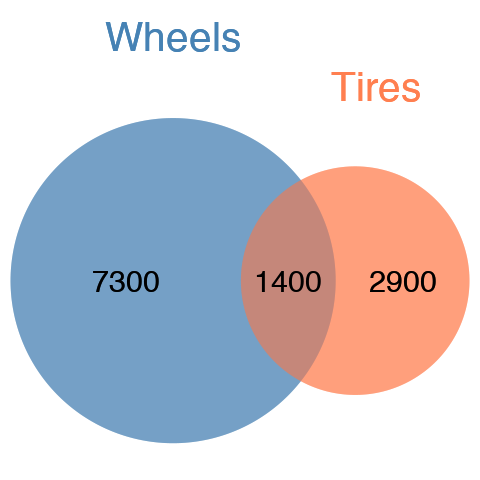

In [99]:
options(repr.plot.width=4,repr.plot.height=4)
venn.plot <- draw.pairwise.venn(
    area1 = wheels, area2 = tires, cross.area = wheels_and_tires,
    category = c("Wheels", "Tires"),
    fill = c("steelblue", "coral"),
    lty = "blank",
    cex = 1.5, cat.cex = 2, 
    cat.dist = c(0.1, 0.1), cat.pos = c(0, 6),
    cat.col = c("steelblue", "coral")
);
grid.draw(venn.plot);

In [100]:
answer_dictionary[17] <- toString(wheels_or_tires)

## 18.
Какое количество натуральных чисел удовлетворяет логическому условию: 

How many natural numbers satisfy the logical condition: 

$\neg (X^2 \geq 9) \lor \neg ((X < 7) \lor (X \geq 10))$?

$\neg (X^2 \geq 9) \lor \neg ((X < 7) \lor (X \geq 10)) \ (X \in \mathbb{N}) \iff$

$\iff \neg ((X \leq -3) \lor (X \geq 3)) \lor \neg ((X < 7) \lor (X \geq 10)) \ (X \in \mathbb{N}) \iff$

$ \iff (-3 < X < 3) \lor (7 \leq X < 10) \ (X \in \mathbb{N}) \iff$

$\iff X \in \{1, 2, 7, 8, 9\} \ (X \in \mathbb{N})$

In [101]:
answer_dictionary[18] <- toString(length(c(1, 2, 7, 8, 9)))

## 19.

## 20.

## 21.

## 22.

## 23.

## Часть 2 &nbsp; &nbsp; &nbsp; Part 2

## 24.

## 25.

## 26.

## 27.

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [102]:
answer_dictionary

<hash> containing 18 key-value pair(s).
  1 : 6
  10 : ДДБД
  11 : 17
  12 : CADB
  13 : 100
  14 : 8877
  15 : 36
  16 : 5
  17 : 11600
  18 : 5
  2 : 45
  3 : 30
  4 : 3
  5 : 00
  6 : AD
  7 : -6
  8 : 1024
  9 : 4